

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

Epoch 1/3


1875/1875 [==============================] - 5s 2ms/step - loss: 0.6382 - accuracy: 0.8389 - val_loss: 0.3534 - val_accuracy: 0.9033
Epoch 2/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3353 - accuracy: 0.9069 - val_loss: 0.2906 - val_accura

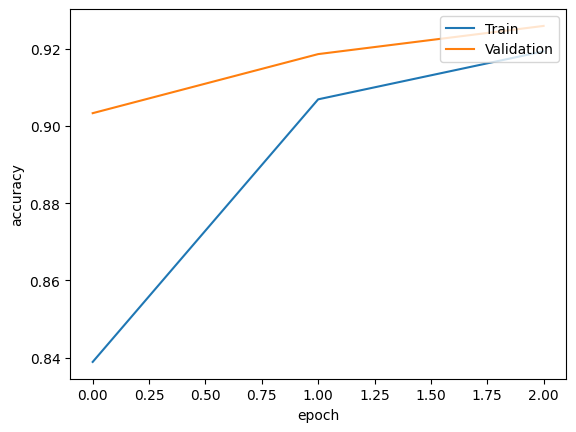

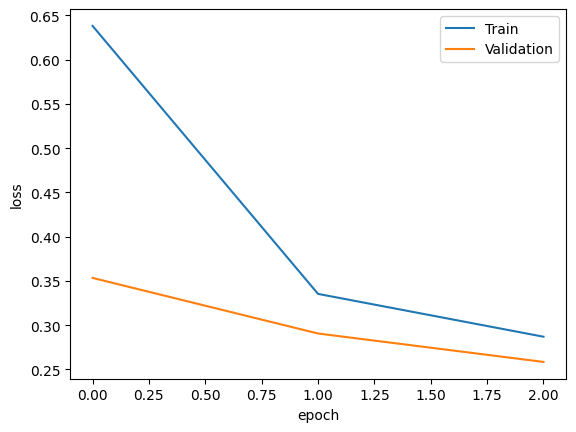

In [1]:
#import necessary packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random
#load dataset
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train = x_train/255
x_test = x_test/255#values in 0 to 1 helps to numerical calvulations and prevents overflow,gradient stability
#define the netword architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])
model.summary()
#train model using sgd
model.compile(optimizer="sgd", loss="sparse_categorical_crossentropy", metrics=['accuracy'])
history=model.fit(x_train, y_train,validation_data=(x_test,y_test),epochs=3)
#evaluate network
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)
#plotting train accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()
#plotting train loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()